<a href="https://colab.research.google.com/github/JaladiRishitha/U-Net_GI-tract-segmentation/blob/main/Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 8. Predict result on validation set. Display result and compare it with initial masks

In [ ]:
X, y = val_data_gen[2]
pred = unet_model.predict(X)

1/1 [==============================] - 0s 264ms/step


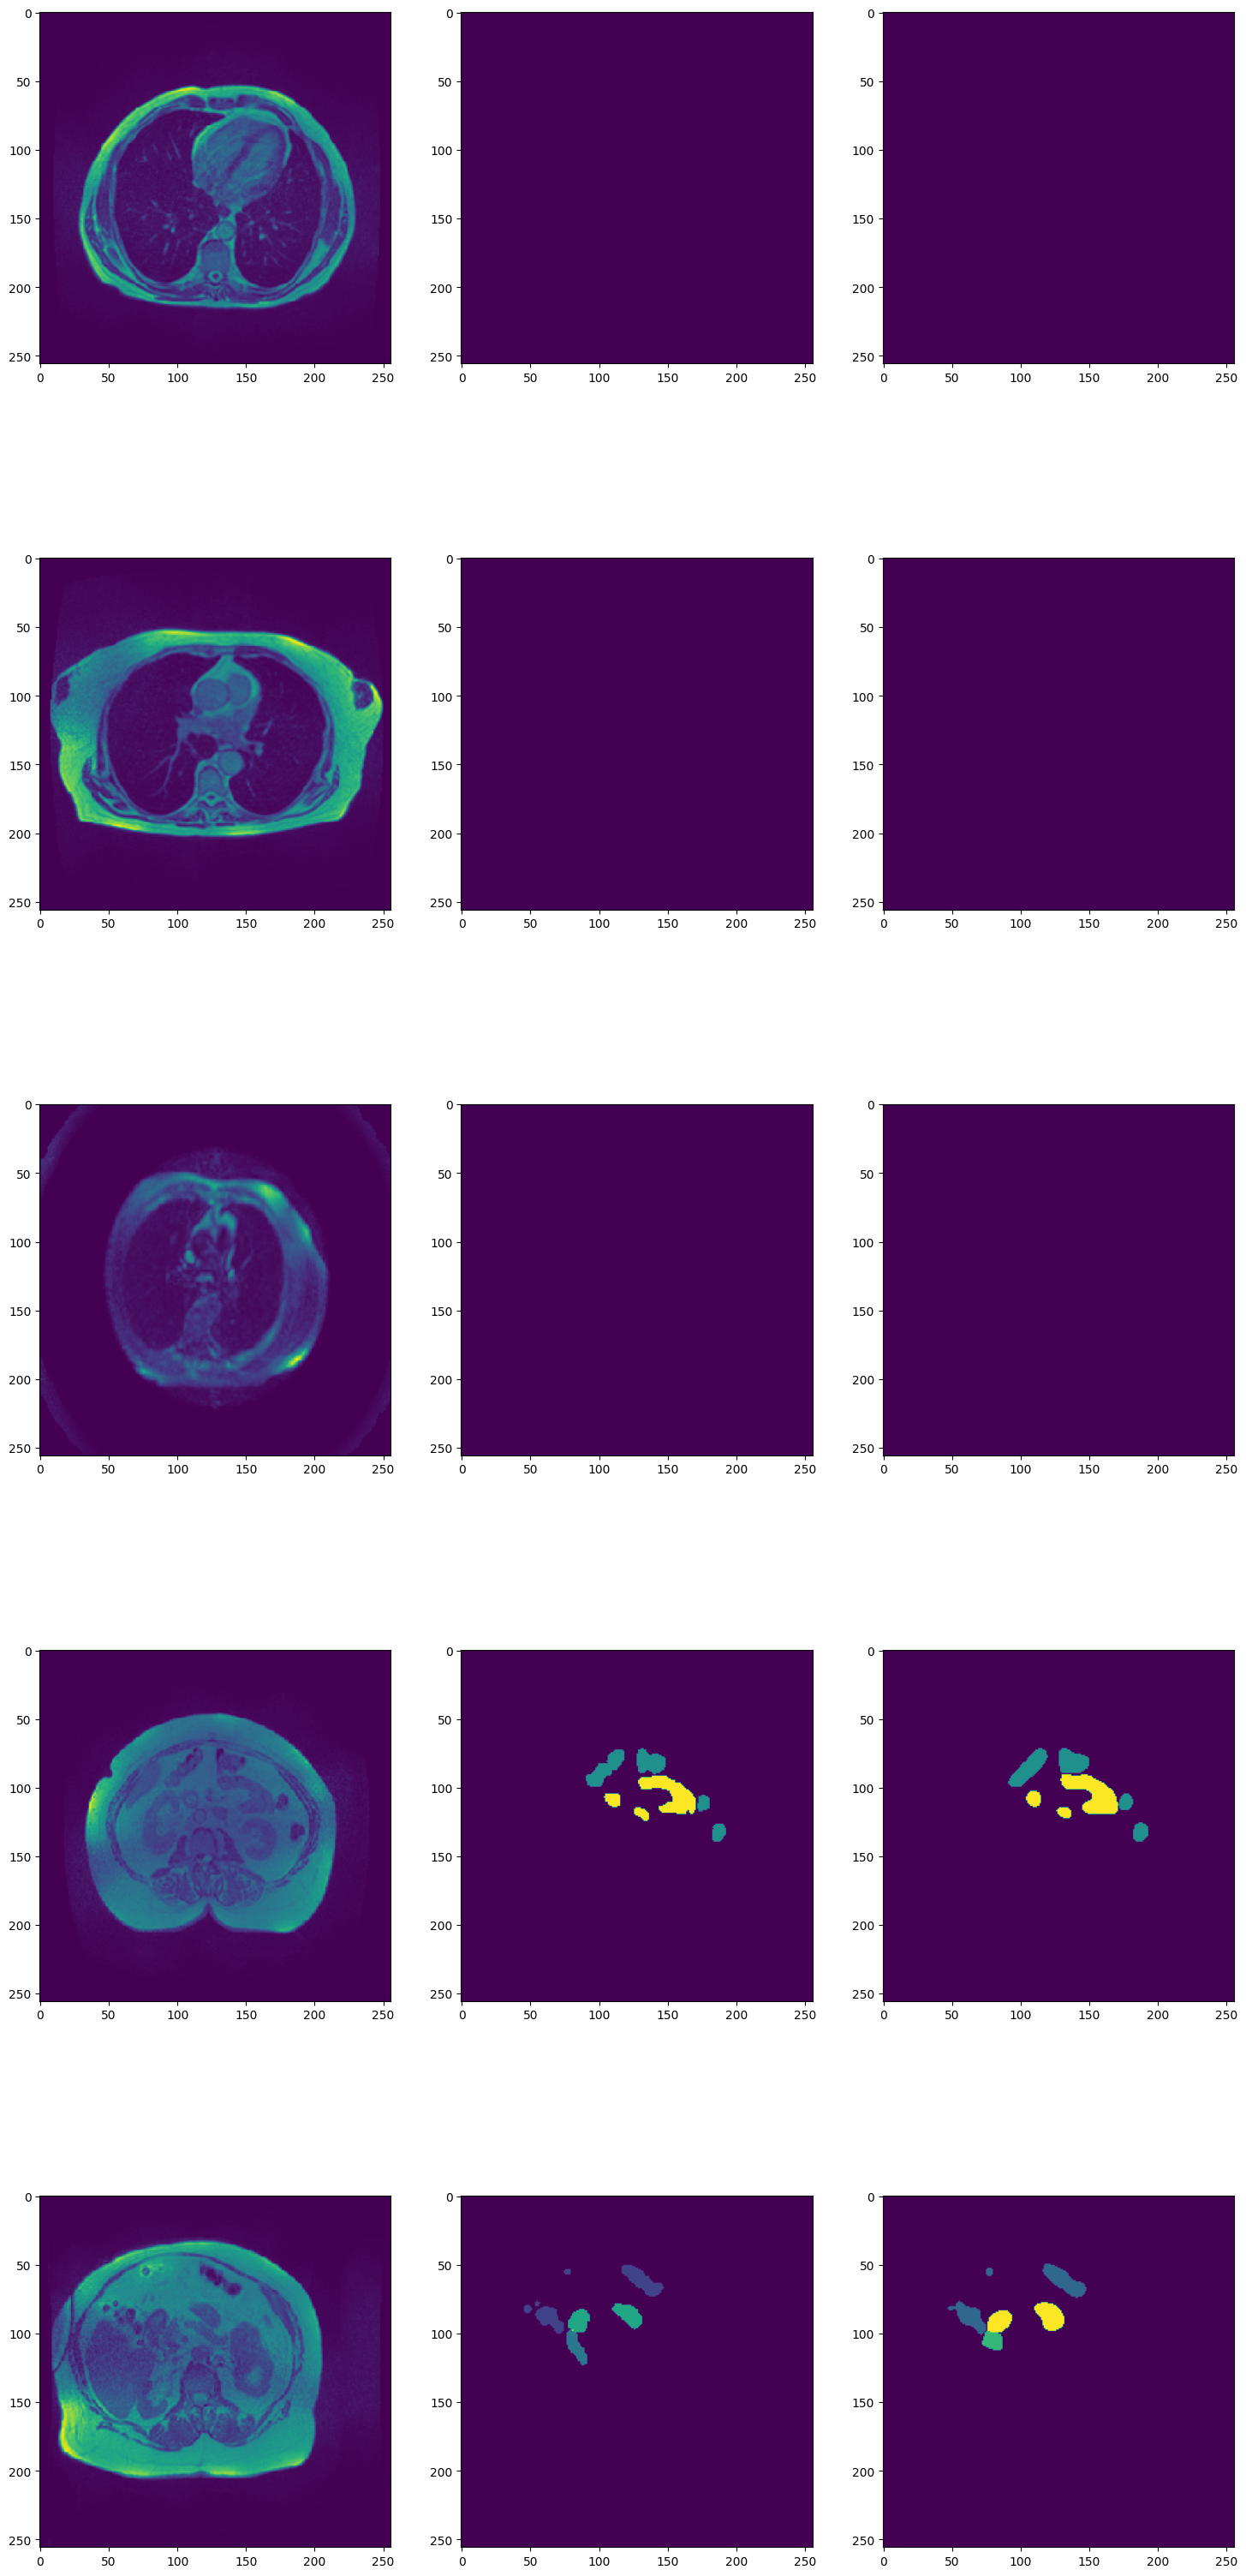

In [ ]:
num = 5
fig, ax = plt.subplots(num, 3, figsize=(18, 8 * num))

for i in range(num):
    img = X[i, :, :, 0]
    masks = y[i]
    pred_masks = pred[i]
    ax[i, 0].imshow(img)

    mask = np.zeros(masks.shape[:-1])
    for j in range(masks.shape[-1]):
        m = masks[:, :, j]
        mask += m*(j+1)/4*np.max(img)
    ax[i, 1].imshow(mask)

    pred_mask = np.zeros(masks.shape[:-1])
    for j, cl in enumerate(classes):
        m = (pred_masks[:, :, j] > 0.5).astype(np.float32)
        pred_mask += m*(j+1)/4*np.max(img)
    ax[i, 2].imshow(pred_mask)